In [36]:
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Carga de Datos

Nota: A partir del c13 al c18 son duplicados

In [37]:

conjuntoImgs = []
conjuntoGris = []
conjuntoBin = []
y = []

for i in range(1, 19):
    for j in range(10):
        ruta = f'5DV1/C{i}/N{j}.JPG'
        temp = cv2.imread(ruta)

        temp = cv2.resize(temp, (32, 64))
        temp_RGB = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        conjuntoImgs.append(temp)
        
        temp_gris = cv2.cvtColor(temp_RGB, cv2.COLOR_RGB2GRAY)
        conjuntoGris.append(temp_gris)
        
        _, temp_bin = cv2.threshold(temp_gris, 127, 1, cv2.THRESH_BINARY)
        conjuntoBin.append(temp_bin)
    
        match(j):
            case 0: y.append([1,0,0,0,0,0,0,0,0,0])
            case 1: y.append([0,1,0,0,0,0,0,0,0,0])
            case 2: y.append([0,0,1,0,0,0,0,0,0,0])
            case 3: y.append([0,0,0,1,0,0,0,0,0,0])
            case 4: y.append([0,0,0,0,1,0,0,0,0,0])
            case 5: y.append([0,0,0,0,0,1,0,0,0,0])
            case 6: y.append([0,0,0,0,0,0,1,0,0,0])
            case 7: y.append([0,0,0,0,0,0,0,1,0,0])
            case 8: y.append([0,0,0,0,0,0,0,0,1,0])
            case 9: y.append([0,0,0,0,0,0,0,0,0,1])

# Convertir las listas en arrays de numpy
conjuntoImgs = np.array(conjuntoImgs)
conjuntoGris = np.array(conjuntoGris)
conjuntoBin = np.array(conjuntoBin)
y = np.array(y)



### Declaración de funciones

In [138]:
# Definiendo funcion de activacion

def sigmoid(x):
	return 1/(1 + np.exp(-x))

def f_forward(x, w1, w2):
	# Oculta
	z1 = x.dot(w1)# Entrada de la capa 1 (oculta)
	a1 = sigmoid(z1)# Salia para la entrada de la capa 2
	
	# Capa de salida
	z2 = a1.dot(w2)# entrada de la capa 2 o de salida
	a2 = sigmoid(z2)# salida de la capa
	return(a2)

# Generacion aleatoria de pesos
def generate_wt(x, y):
	return np.random.randn(x, y)
	
# cálculo de la perdida con mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(Y)
	return(s)

def mse_loss(y_true, y_pred):
	t = np.array(y_true)
	p = np.array(y_pred)
	return np.mean((t-p) ** 2)


# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
	
	# capa oculta
	z1 = x.dot(w1)# entrada de la capa 1
	a1 = sigmoid(z1)# entrada de la capa 2 (salida)
	
	# capa de salida
	z2 = a1.dot(w2)# entrada de la capa de salida
	a2 = sigmoid(z2)# salida de la capa de salida
	# error en la capa de salida
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
								(np.multiply(a1, 1-a1)))

	# Gradiente para w1 y w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Actualizando parámetros
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)


def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], Y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	k = np.argmax(Out)  # Índice del valor máximo
	# print(f"El numero en la imagen es: {r}.")
	# plt.figure()
	# plt.imshow(x.reshape(64, 32))
	# plt.show()
	return k

def predict_RGB(x, w1, w2):
	Out = f_forward(x, w1, w2)
	k = np.argmax(Out)  # Índice del valor máximo
	# print(f"El numero en la imagen es: {r}.")
	# plt.figure()
	# plt.imshow(x.reshape(64, 32, 3))
	# plt.show()
	return k

### Partición de los datos

In [39]:
X_train_RGB, X_test_RGB, Y_train_RGB, Y_test_RGB = train_test_split(conjuntoImgs, y, test_size = 0.2)
X_train_Gris, X_test_Gris, Y_train_Gris, Y_test_Gris = train_test_split(conjuntoGris, y, test_size = 0.2)
X_train_Bin, X_test_Bin, Y_train_Bin, Y_test_Bin = train_test_split(conjuntoBin, y, test_size = 0.2)

X_train_RGB = X_train_RGB.reshape(144, 1, -1)  
X_test_RGB = X_test_RGB.reshape(36, 1, -1)  
Y_train_RGB = Y_train_RGB.reshape(144, 1, -1)
Y_test_RGB = Y_test_RGB.reshape(36, 1, -1)

X_train_Gris = X_train_Gris.reshape(144, 1, -1)  
X_test_Gris = X_test_Gris.reshape(36, 1, -1)  
Y_train_Gris = Y_train_Gris.reshape(144, 1, -1)
Y_test_Gris = Y_test_Gris.reshape(36, 1, -1)

X_train_Bin = X_train_Bin.reshape(144, 1, -1)  
X_test_Bin = X_test_Bin.reshape(36, 1, -1)
Y_train_Bin = Y_train_Bin.reshape(144, 1, -1)
Y_test_Bin = Y_test_Bin.reshape(36, 1, -1)  

### Entrenamiento de las redes

##### RBG

In [88]:
w1_RGB = generate_wt(6144, 168)
w2_RGB = generate_wt(168, 10)
print(w1_RGB, "\n\n", w2_RGB)

[[-0.192181    1.43359425 -0.09383216 ...  0.50842511 -0.31160028
   0.52580285]
 [ 0.0371838   0.18774137  0.65048329 ... -0.50975838 -1.54363561
   1.68664333]
 [-0.65196416 -0.35332672  0.00876167 ... -1.79731279  0.07483075
  -2.18813953]
 ...
 [ 0.27301028  0.9510233   0.21120555 ... -0.28401337 -0.41414858
   0.3364459 ]
 [ 0.46492157 -0.38407744 -1.28977324 ... -1.52039919  1.53042576
  -0.43163469]
 [-0.01560897  0.346003    0.12775179 ... -0.47358569 -1.30533541
   1.73200843]] 

 [[-1.17780309  1.3436871   0.63436327 ...  0.92803316  0.71782274
  -0.27367618]
 [-2.41593333  0.39821957  0.64867344 ...  0.3082111  -0.12200016
   0.56343213]
 [ 0.76968932 -0.81705418  0.07409571 ... -1.91923727 -0.89169857
   0.46936413]
 ...
 [-1.32643556  0.02355082  1.50301855 ...  0.42400174  0.58298234
   0.19729838]
 [ 0.4881521  -0.23752165  0.55900238 ...  2.74825377 -0.46301163
  -0.36591315]
 [-1.58813893  0.49030596  0.39615297 ... -2.03347796 -1.30220408
  -1.95058907]]


In [89]:
acc_RGB, losss_RGB, w1_RGB, w2_RGB = train(X_train_RGB, Y_train_RGB, w1_RGB, w2_RGB, 0.1, 100)

C:\Users\abiab\AppData\Local\Temp\ipykernel_35828\3133336208.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


epochs: 1 ======== acc: -54.99908951212937
epochs: 2 ======== acc: -39.24641094348971
epochs: 3 ======== acc: -31.18206593526489
epochs: 4 ======== acc: -22.478908704529644
epochs: 5 ======== acc: -14.409521450075523
epochs: 6 ======== acc: -7.991516429135448
epochs: 7 ======== acc: -3.095901082308128
epochs: 8 ======== acc: 0.9029991977238305
epochs: 9 ======== acc: 4.7539687450403605
epochs: 10 ======== acc: 8.10173776422537
epochs: 11 ======== acc: 10.815925235574554
epochs: 12 ======== acc: 13.047150997226675
epochs: 13 ======== acc: 15.014569363675069
epochs: 14 ======== acc: 16.852231324966528
epochs: 15 ======== acc: 18.54026027771504
epochs: 16 ======== acc: 20.041289494046733
epochs: 17 ======== acc: 21.400949801683865
epochs: 18 ======== acc: 22.660211355700575
epochs: 19 ======== acc: 23.83550179673818
epochs: 20 ======== acc: 24.955278941480742
epochs: 21 ======== acc: 26.059796928288282
epochs: 22 ======== acc: 27.17797830743868
epochs: 23 ======== acc: 28.320809645001766


#### Escala de Grises

In [127]:
w1_Gris = generate_wt(2048, 184)
w2_Gris = generate_wt(184, 10)
print(w1_Gris, "\n\n", w2_Gris)

[[-0.52161976 -1.16371059 -0.40258661 ... -0.88245708  0.66112427
  -0.6017837 ]
 [-0.56309006 -0.4470916  -1.11801485 ...  0.93624564 -1.00604898
   0.58104587]
 [ 0.21201178  0.96399081 -0.19031718 ...  1.4892811  -0.35175235
  -0.8853956 ]
 ...
 [-0.50927016 -0.04384132  0.43825632 ... -1.87166571 -0.98047078
   0.34190023]
 [ 0.51050628  0.12974058  1.37061836 ... -0.5290191   1.26610359
  -0.09351921]
 [-0.89075603 -0.03666369  0.53639332 ... -1.19641425 -0.96170376
  -0.37534346]] 

 [[ 1.14248675 -2.02494107 -2.12914016 ... -1.1550225   0.80929793
   1.98469169]
 [-0.48255556  0.38676454  0.1924262  ... -0.44139598  0.43759516
   1.24994493]
 [ 0.41297344 -0.60778887 -1.35881642 ... -1.42360871  0.41841465
  -0.1431319 ]
 ...
 [ 1.08433029 -0.05779365 -0.24958074 ...  0.23190608  0.65190527
  -2.31527001]
 [-0.30820821 -0.59937509  1.39118308 ... -1.55458907 -1.31680539
  -0.01689337]
 [-0.92448145  0.89551763  1.76403335 ...  0.02256162 -0.77816171
   0.87010344]]


In [128]:
acc_Gris, losss_Gris, w1_Gris, w2_Gris = train(X_train_Gris, Y_train_Gris, w1_Gris, w2_Gris, 0.01, 100)

C:\Users\abiab\AppData\Local\Temp\ipykernel_35828\3133336208.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


epochs: 1 ======== acc: -42.15161710613238
epochs: 2 ======== acc: -12.789760778331715
epochs: 3 ======== acc: -15.362119920356033
epochs: 4 ======== acc: -13.090844877456774
epochs: 5 ======== acc: -11.959064883205306
epochs: 6 ======== acc: -10.64361749409699
epochs: 7 ======== acc: -9.339019251112624
epochs: 8 ======== acc: -8.094468524638865
epochs: 9 ======== acc: -6.883346066733731
epochs: 10 ======== acc: -5.774426765123475
epochs: 11 ======== acc: -4.912927829530456
epochs: 12 ======== acc: -3.8786963657078566
epochs: 13 ======== acc: -2.747682341910207
epochs: 14 ======== acc: -1.640672803486698
epochs: 15 ======== acc: -0.5564286736729374
epochs: 16 ======== acc: 0.5061454494743822
epochs: 17 ======== acc: 1.5479545586685628
epochs: 18 ======== acc: 2.569735843823573
epochs: 19 ======== acc: 3.5720864180308287
epochs: 20 ======== acc: 4.555492208443623
epochs: 21 ======== acc: 5.520355059577298
epochs: 22 ======== acc: 6.467016079750588
epochs: 23 ======== acc: 7.395774203583

#### Binario

In [ ]:
w1_Bin = generate_wt(2048, 80)
w2_Bin = generate_wt(80, 10)
print(w1_Bin, "\n\n", w2_Bin)

[[ 0.08293201 -1.12143254 -1.61620257 ...  0.37952993 -1.71339713
  -0.66113286]
 [ 0.52188584 -0.0103024  -0.11031398 ... -0.34426868  0.98759727
  -0.03627528]
 [ 1.19113036  0.68743606  0.74470468 ... -0.11916426  0.19425994
  -1.32687581]
 ...
 [-0.15631459 -1.37241592  1.09386611 ... -1.09655691 -0.59490852
  -1.21701328]
 [-0.29469923  0.11237145  1.18462664 ...  1.44879182  0.09727704
  -2.16564738]
 [-0.92542866  0.37147009 -0.56767063 ...  0.01297187  1.19116305
   0.19851632]] 

 [[ 1.06774954e+00  1.33672167e+00  1.06238629e+00  4.50305209e-01
   1.40420871e+00  4.34246014e-01 -6.80434223e-02  3.44459192e-01
   1.69461768e+00  1.25436845e+00]
 [-5.14168686e-01 -2.81545708e-01  8.66896364e-02  1.61439945e+00
  -1.78095402e+00 -8.15014253e-01 -1.01451669e+00 -1.83286834e+00
   1.25564381e+00  1.28873237e+00]
 [ 1.18728061e+00 -6.32091464e-01 -1.12943411e-01  4.51717334e-01
   1.09264561e+00 -2.24625317e+00 -8.47417281e-01  8.60310176e-01
  -9.20396487e-01 -8.31348259e-01]
 [-4

In [114]:
acc_Bin, losss_Bin, w1_Bin, w2_Bin = train(X_train_Bin, Y_train_Bin, w1_Bin, w2_Bin, 0.01, 100)

epochs: 1 ======== acc: -44.04106961552612
epochs: 2 ======== acc: -0.8933638659449405
epochs: 3 ======== acc: 4.202070236759859
epochs: 4 ======== acc: 8.136961192602554
epochs: 5 ======== acc: 9.69952050995888
epochs: 6 ======== acc: 12.82431656735029
epochs: 7 ======== acc: 14.863285347287237
epochs: 8 ======== acc: 15.58942436212506
epochs: 9 ======== acc: 16.69930642442309
epochs: 10 ======== acc: 17.32071348145512
epochs: 11 ======== acc: 18.505127158859292
epochs: 12 ======== acc: 18.698760642166
epochs: 13 ======== acc: 19.514560875271016
epochs: 14 ======== acc: 19.42335808954262
epochs: 15 ======== acc: 19.85100254098182
epochs: 16 ======== acc: 20.9532006061241
epochs: 17 ======== acc: 21.930940159845015
epochs: 18 ======== acc: 22.65137105478785
epochs: 19 ======== acc: 23.194460131639804
epochs: 20 ======== acc: 23.695090337315616
epochs: 21 ======== acc: 24.134139252765063
epochs: 22 ======== acc: 24.551976959558452
epochs: 23 ======== acc: 25.098480344034257
epochs: 24 =

### Acuary Final

#### RGB

In [139]:
pred = []
real = []
for tx, ty in zip(X_test_RGB, Y_test_RGB):
    pred.append(predict_RGB(tx, w1_RGB, w2_RGB))
    real.append(np.argmax(ty))

error = 0
for p, r in zip(pred, real):
    if p != r:
        error += 1

aciertos = ((len(pred) - error) / len(pred)) * 100
perdida = mse_loss(real, pred)

print(f'Exactitud: {aciertos:.2f} %')
print(f'Perdida: {perdida:.2f}')

Exactitud: 38.89 %
Perdida: 12.19


C:\Users\abiab\AppData\Local\Temp\ipykernel_35828\2628907244.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


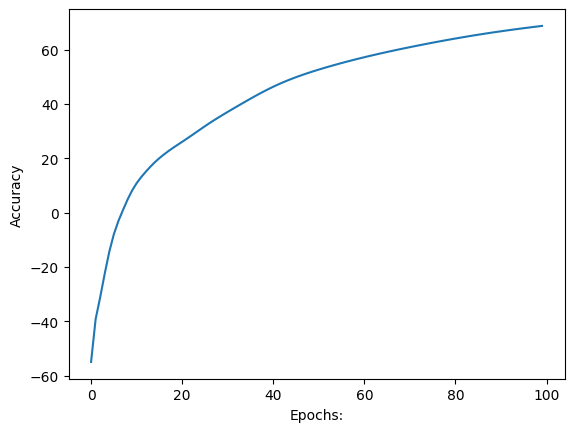

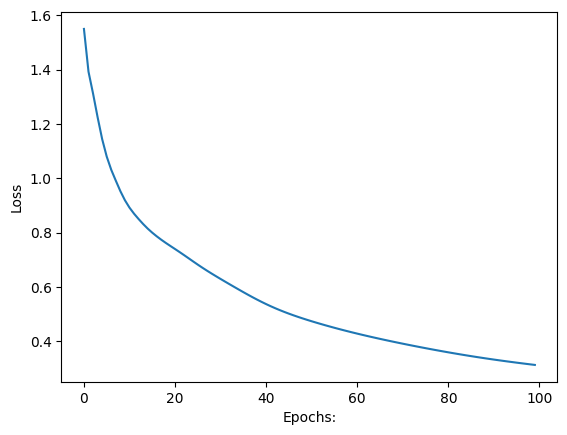

In [142]:
# plotting accuracy
plt.plot(acc_RGB)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()

# plotting Loss
plt.plot(losss_RGB)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show()

#### Escala de Grises

In [140]:
pred = []
real = []
for tx, ty in zip(X_test_Gris, Y_test_Gris):
    pred.append(predict(tx, w1_Gris, w2_Gris))
    real.append(np.argmax(ty))

error = 0
for p, r in zip(pred, real):
    if p != r:
        error += 1

aciertos = ((len(pred) - error) / len(pred)) * 100
perdida = mse_loss(real, pred)

print(f'Exactitud: {aciertos:.2f} %')
print(f'Perdida: {perdida:.2f}')

Exactitud: 44.44 %
Perdida: 8.83


C:\Users\abiab\AppData\Local\Temp\ipykernel_35828\2628907244.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


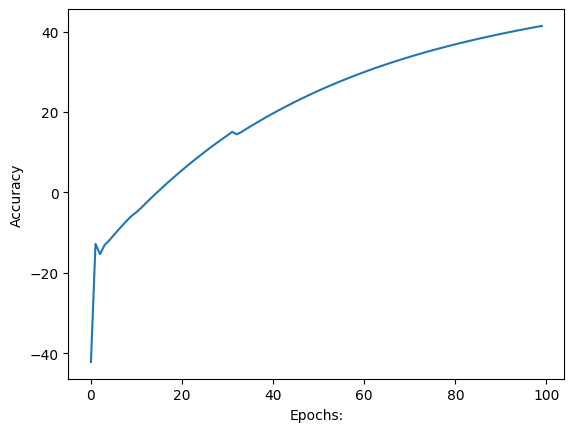

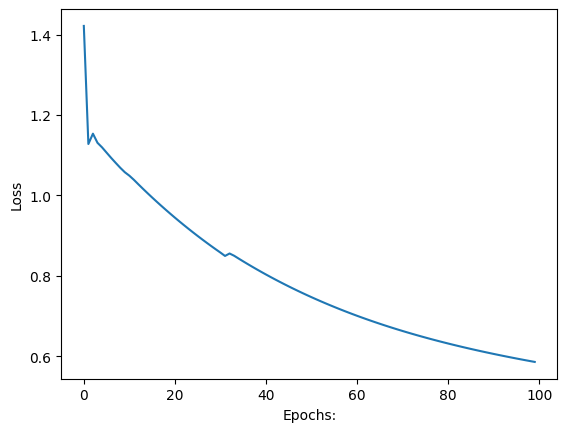

In [146]:
# plotting accuracy
plt.plot(acc_Gris)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()

# plotting Loss
plt.plot(losss_Gris)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show()

#### Binario

In [141]:
pred = []
real = []
for tx, ty in zip(X_test_Bin, Y_test_Bin):
    pred.append(predict(tx, w1_Bin, w2_Bin))
    real.append(np.argmax(ty))

error = 0
for p, r in zip(pred, real):
    if p != r:
        error += 1

aciertos = ((len(pred) - error) / len(pred)) * 100
perdida = mse_loss(real, pred)

print(f'Exactitud: {aciertos:.2f} %')
print(f'Perdida: {perdida:.2f}')

Exactitud: 41.67 %
Perdida: 6.67


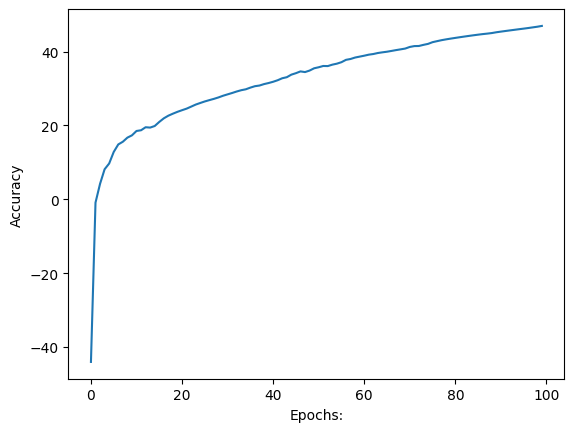

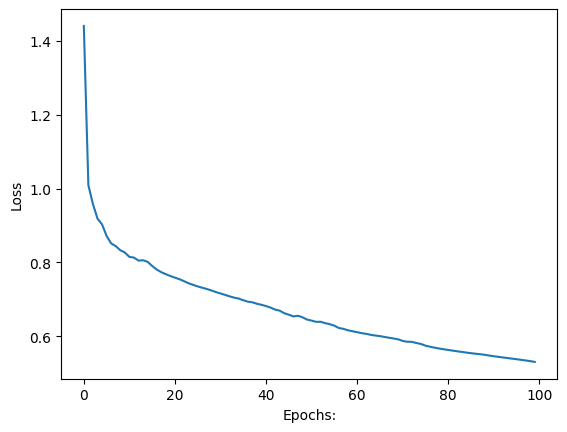

In [145]:
# plotting accuracy
plt.plot(acc_Bin)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()

# plotting Loss
plt.plot(losss_Bin)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show()